In [1]:
import numpy as np
import matplotlib.pyplot

class Perceptron:
    def __init__(self, input_dim, hidden_dim, output_dim, lr = 0.01):
        self.w1 = np.random.normal(0.0, pow(hidden_dim, -0.5), (input_dim, hidden_dim))
        self.w2 = np.random.normal(0.0, pow(hidden_dim, -0.5), (hidden_dim, output_dim))
        self.h = np.zeros((1, hidden_dim))
        self.lr = lr
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.theta = 0
        
    def softmax(self, x):
        e_x = np.exp(x-np.max(x))
        return e_x / e_x.sum(axis = 0) #only difference
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def feedforward(self, x):
        a = x.astype(float)
        b = self.w1.astype(float)
        self.h = self.sigmoid(np.dot(a,b) - self.theta)
        return self.sigmoid(np.dot(self.h, self.w2) - self.theta)
    
    def feedforward_upto_hidden(self, x):
        return self.sigmoid(np.dot(x, self.w1) - self.theta)
    
    def bprop_w2(self, g, y): #target, output
        q = (-2)*(g-y)*(y)*(1-y)
        return np.dot(self.h.reshape(self.hidden_dim, 1), q.reshape(1, self.output_dim))
    
    def bprop_w1(self, g, y, x): #target, output, input
        q1 = (-2)*(g-y)*(y)*(1-y)
        q2 = np.dot(self.w2, q1)
        return np.dot(x.reshape(self.input_dim, 1), q2*self.h*(1-self.h).reshape(1, self.hidden_dim))
    
    def training(self, input, target):
        x = np.array(input).T
        y = self.feedforward(x)
        g = np.array(target).T
        
        self.w2 = self.w2 - self.lr*self.bprop_w2(g, y)
        self.w1 = self.w1 - self.lr*self.bprop_w1(g, y, x)

In [6]:
#training 1
input_dim = 784
hidden_dim = 700
output_dim = 4
epoch = 10

pct = Perceptron(input_dim, hidden_dim, output_dim, 0.1)
training_dataset_file = open("ML_final_project_data_modified_2.csv", 'r')
#training-dataset_file = open("mnist_train.csv", 'r')

training_dataset_list = training_dataset_file.readlines()
training_dataset_file.close()
input_list = list()

for k in range(epoch):
    print(k)
    pct.lr = pct.lr * 0.8 #learning rate decay
    for i in training_dataset_list:
        all_values = i.split(',')
        inputs = (np.asfarray(all_values[1:])/255.0*0.99) +0.01
        input_list.append(inputs)
        
        targets = np.zeros(output_dim) + 0.01
        targets[int(all_values[0])] = 0.99
        
        pct.training(inputs, targets)

0
1
2
3
4
5
6
7
8
9


In [7]:
#Test
test_dataset_file = open("ML_final_project_data_modified_2.csv", 'r')
#test_dataset_file = open("mnist_test.csv", 'r')

test_dataset_list = test_dataset_file.readlines()
test_dataset_file.close()
output_list = list()

Prediction fails. (target, prediction) =  2 0
Prediction =  [9.90367721e-01 1.16091648e-07 3.32931543e-02 1.79753108e-06]
Prediction fails. (target, prediction) =  2 3
Prediction =  [1.74273277e-04 5.86390185e-09 2.23369802e-01 4.59299756e-01]
Prediction fails. (target, prediction) =  0 2
Prediction =  [9.90604279e-03 5.52882394e-06 2.99007337e-02 2.32577800e-04]
Prediction fails. (target, prediction) =  3 0
Prediction =  [2.98944021e-02 3.54265963e-05 1.16888746e-03 2.02379096e-04]
Prediction fails. (target, prediction) =  0 2
Prediction =  [6.17548389e-03 1.49286919e-05 1.09366841e-02 3.90951400e-04]
Prediction fails. (target, prediction) =  3 0
Prediction =  [8.39424616e-01 3.37194299e-08 1.36828772e-03 3.49582427e-03]
Prediction fails. (target, prediction) =  1 0
Prediction =  [1.82191279e-01 6.05742732e-03 4.12401122e-07 5.59240144e-05]
Prediction fails. (target, prediction) =  1 0
Prediction =  [6.47742789e-01 1.04283362e-04 1.23198814e-01 2.38414398e-09]
Prediction fails. (targe

Prediction fails. (target, prediction) =  2 3
Prediction =  [1.89329042e-05 3.71634812e-10 9.03419047e-03 9.99394858e-01]
Prediction fails. (target, prediction) =  3 1
Prediction =  [1.55714292e-10 8.50312926e-01 4.20589668e-02 5.63278642e-06]
Prediction fails. (target, prediction) =  3 1
Prediction =  [2.19464402e-09 8.64770248e-02 1.45309035e-03 1.11440424e-02]
Prediction fails. (target, prediction) =  3 2
Prediction =  [4.41597689e-09 1.37858791e-06 8.26628354e-01 4.34105919e-01]
Prediction fails. (target, prediction) =  1 3
Prediction =  [1.19350825e-13 1.46461204e-03 1.93210754e-04 9.99715056e-01]
Prediction fails. (target, prediction) =  2 0
Prediction =  [1.10008514e-01 2.38408939e-02 2.16985611e-02 1.26570267e-10]
Prediction fails. (target, prediction) =  0 3
Prediction =  [1.06064376e-06 4.31680666e-07 7.51540053e-06 9.99924622e-01]
Prediction fails. (target, prediction) =  2 1
Prediction =  [6.40007944e-05 9.97572978e-01 1.12173693e-05 1.76226137e-09]
Prediction fails. (targe

Prediction =  [2.16653446e-09 9.99869339e-01 7.29023098e-04 7.59492059e-09]
Prediction fails. (target, prediction) =  0 3
Prediction =  [3.19269403e-02 1.11455064e-10 9.10218291e-04 9.85627064e-01]
Prediction fails. (target, prediction) =  0 1
Prediction =  [3.96473335e-07 6.92426604e-01 2.81069525e-03 1.81516100e-06]
Prediction fails. (target, prediction) =  3 0
Prediction =  [1.47626084e-01 7.21902725e-03 2.92919310e-05 1.58901794e-06]
Prediction fails. (target, prediction) =  2 1
Prediction =  [1.70285345e-02 3.34192334e-01 3.04024652e-02 4.70705109e-12]
Prediction fails. (target, prediction) =  2 1
Prediction =  [5.74951905e-03 5.60276490e-01 5.94223258e-02 1.77523862e-12]
Prediction fails. (target, prediction) =  0 2
Prediction =  [6.57069654e-03 2.74452439e-04 1.87864960e-02 6.89368793e-06]
Prediction fails. (target, prediction) =  3 0
Prediction =  [6.23723950e-01 4.68692754e-08 1.77037544e-04 5.37185353e-02]
Prediction fails. (target, prediction) =  1 0
Prediction =  [3.6785521

Prediction fails. (target, prediction) =  0 3
Prediction =  [6.33196907e-11 2.20711034e-04 6.64033276e-07 9.99981905e-01]
Prediction fails. (target, prediction) =  3 0
Prediction =  [9.69358399e-01 2.62652636e-09 4.20447420e-07 8.05045107e-01]
Prediction fails. (target, prediction) =  3 0
Prediction =  [9.48350025e-01 1.57746878e-06 3.04454412e-03 3.23303779e-06]
Prediction fails. (target, prediction) =  2 1
Prediction =  [2.52623908e-08 9.99999839e-01 3.58750485e-04 2.85142329e-14]
Prediction fails. (target, prediction) =  1 2
Prediction =  [2.19051822e-02 3.48797827e-03 5.03878946e-02 6.62463249e-09]
Prediction fails. (target, prediction) =  0 3
Prediction =  [4.94895472e-01 8.04536503e-11 4.14511901e-04 8.98099525e-01]
Prediction fails. (target, prediction) =  2 0
Prediction =  [9.87167369e-01 4.54440517e-09 1.71354036e-01 1.11122830e-05]
Prediction fails. (target, prediction) =  0 1
Prediction =  [1.24576368e-03 3.56232044e-02 5.42526510e-05 1.38892002e-05]
Prediction fails. (targe

Prediction fails. (target, prediction) =  2 1
Prediction =  [2.83205618e-04 9.19163512e-01 1.54320593e-04 5.25279325e-09]
Prediction fails. (target, prediction) =  2 0
Prediction =  [1.41983258e-01 3.18112457e-08 9.55477907e-02 1.23333448e-03]
Prediction fails. (target, prediction) =  0 2
Prediction =  [5.39670227e-02 1.45592136e-04 5.16228805e-01 6.37824442e-09]
Prediction fails. (target, prediction) =  3 1
Prediction =  [2.21308956e-12 8.81548910e-01 4.40248118e-04 2.03916926e-02]
Prediction fails. (target, prediction) =  0 2
Prediction =  [1.50328076e-06 2.21420231e-02 2.69779087e-01 1.27498135e-06]
Prediction fails. (target, prediction) =  1 3
Prediction =  [1.95684649e-06 8.78584839e-05 1.03707296e-04 7.58754666e-01]
Prediction fails. (target, prediction) =  0 3
Prediction =  [1.08117634e-08 2.61146835e-03 7.24320072e-06 9.56927321e-01]
Prediction fails. (target, prediction) =  0 2
Prediction =  [6.32700289e-07 3.53156291e-03 4.41531522e-02 3.97364925e-04]
Prediction fails. (targe

Prediction fails. (target, prediction) =  0 3
Prediction =  [5.34141694e-01 5.48178314e-10 4.87240290e-07 9.95845820e-01]
Prediction fails. (target, prediction) =  3 0
Prediction =  [9.70999602e-01 1.74249771e-07 7.20047180e-03 2.93013157e-05]
Prediction fails. (target, prediction) =  2 3
Prediction =  [9.64612007e-04 4.40014407e-07 2.15619324e-02 6.89591337e-02]
Prediction fails. (target, prediction) =  1 3
Prediction =  [1.30598270e-13 1.65952099e-01 3.77658580e-06 9.97074753e-01]
Prediction fails. (target, prediction) =  3 0
Prediction =  [9.99768454e-01 2.53990644e-09 3.53490383e-06 1.23894674e-02]
Prediction fails. (target, prediction) =  2 1
Prediction =  [1.95998260e-14 6.87048062e-01 1.15868039e-01 1.68249817e-03]
Prediction fails. (target, prediction) =  2 1
Prediction =  [1.79667609e-11 8.47514914e-01 8.03494270e-01 3.11137690e-07]
Prediction fails. (target, prediction) =  1 2
Prediction =  [1.83261406e-09 4.50434081e-01 9.46943326e-01 3.03558321e-08]
Prediction fails. (targe

Prediction fails. (target, prediction) =  1 0
Prediction =  [9.97400007e-01 3.53072857e-06 4.10700179e-06 7.42355504e-05]
Prediction fails. (target, prediction) =  0 2
Prediction =  [1.89382133e-03 2.58519479e-06 8.16355531e-01 1.01676734e-05]
Prediction fails. (target, prediction) =  0 3
Prediction =  [2.29149240e-07 1.23100628e-07 1.66474905e-02 9.86305847e-01]
Prediction fails. (target, prediction) =  3 1
Prediction =  [1.00680490e-03 4.16481622e-02 5.79972383e-07 4.16146284e-04]
Prediction fails. (target, prediction) =  1 3
Prediction =  [1.50402235e-12 2.34626026e-01 9.64390377e-08 9.99289418e-01]
Prediction fails. (target, prediction) =  0 3
Prediction =  [9.12124850e-04 7.99433309e-09 1.58400662e-07 9.99953906e-01]
Prediction fails. (target, prediction) =  3 0
Prediction =  [9.99103341e-01 1.88201515e-08 3.74860896e-06 8.40989497e-03]
Prediction fails. (target, prediction) =  1 2
Prediction =  [2.15152560e-06 2.31830526e-04 4.12923057e-02 2.22549962e-03]
Prediction fails. (targe

Prediction fails. (target, prediction) =  1 2
Prediction =  [2.86269919e-09 3.06189787e-01 9.56423592e-01 3.17180370e-08]
Prediction fails. (target, prediction) =  0 3
Prediction =  [5.85985274e-10 4.73936326e-07 4.36961984e-09 9.99999998e-01]
Prediction fails. (target, prediction) =  1 3
Prediction =  [5.83555943e-05 1.85175579e-05 2.85553694e-04 2.71072194e-01]
Prediction fails. (target, prediction) =  2 1
Prediction =  [2.48353930e-05 6.96727135e-01 2.05813791e-03 5.44717919e-08]
Prediction fails. (target, prediction) =  2 0
Prediction =  [7.71657587e-01 1.66399414e-06 2.48649132e-01 1.79534439e-07]
Prediction fails. (target, prediction) =  0 3
Prediction =  [5.97867996e-10 1.01141676e-03 2.74442379e-04 9.52625056e-01]
Prediction fails. (target, prediction) =  0 2
Prediction =  [1.35450014e-02 4.51420524e-06 6.60933887e-01 2.00513902e-06]
Prediction fails. (target, prediction) =  0 3
Prediction =  [1.03883808e-01 6.70278291e-09 3.35770754e-05 8.33557244e-01]
Prediction fails. (targe

Prediction fails. (target, prediction) =  0 1
Prediction =  [1.34844552e-09 9.99999987e-01 2.00399266e-04 5.51418070e-14]
Prediction fails. (target, prediction) =  2 1
Prediction =  [2.05293427e-12 9.99999178e-01 5.43935039e-05 2.85499403e-08]
Prediction fails. (target, prediction) =  1 2
Prediction =  [1.37636149e-07 2.33872456e-02 9.70293135e-01 8.95904547e-08]
Prediction fails. (target, prediction) =  1 3
Prediction =  [2.43963350e-12 5.43245862e-01 2.85852362e-06 8.88857742e-01]
Prediction fails. (target, prediction) =  2 3
Prediction =  [1.18873447e-14 1.19707156e-01 5.93839080e-03 5.96460379e-01]
Prediction fails. (target, prediction) =  1 3
Prediction =  [8.42461539e-11 2.79707801e-06 1.08690708e-07 9.99999974e-01]
Prediction fails. (target, prediction) =  3 0
Prediction =  [9.99695043e-01 9.40223388e-09 9.64548296e-04 5.98796446e-05]
Prediction fails. (target, prediction) =  0 3
Prediction =  [9.32539942e-14 8.47745422e-07 2.04144942e-05 9.99999992e-01]
Prediction fails. (targe

Prediction fails. (target, prediction) =  2 1
Prediction =  [2.08598588e-09 9.99422345e-01 4.24128440e-01 1.34490561e-11]
Prediction fails. (target, prediction) =  1 2
Prediction =  [3.21240273e-02 3.83433637e-05 9.80474767e-02 1.03638553e-06]
Prediction fails. (target, prediction) =  2 3
Prediction =  [2.70325705e-06 2.55987794e-06 3.80019903e-04 9.71647816e-01]
Prediction fails. (target, prediction) =  0 1
Prediction =  [3.84673302e-07 9.91961164e-01 3.88463941e-02 2.84203355e-10]
Prediction fails. (target, prediction) =  2 0
Prediction =  [3.67494128e-01 2.82542422e-01 1.30455393e-04 1.37754322e-10]
Prediction fails. (target, prediction) =  3 1
Prediction =  [1.70688022e-11 9.78065465e-01 5.84324782e-06 1.34930242e-02]
Prediction fails. (target, prediction) =  0 3
Prediction =  [2.28790343e-04 2.80895791e-07 1.32863565e-04 9.56130404e-01]
Prediction fails. (target, prediction) =  0 2
Prediction =  [1.46639486e-02 8.32695709e-06 2.64381289e-01 5.54792163e-06]
Prediction fails. (targe

Prediction fails. (target, prediction) =  0 1
Prediction =  [2.06596016e-08 4.63272690e-01 6.08484436e-04 2.33644450e-04]
Prediction fails. (target, prediction) =  0 1
Prediction =  [1.18017762e-08 9.99982180e-01 2.13894892e-05 1.98863240e-09]
Prediction fails. (target, prediction) =  3 0
Prediction =  [9.69023973e-01 7.09534840e-08 2.61416805e-03 1.08368681e-04]
Prediction fails. (target, prediction) =  2 0
Prediction =  [9.68229457e-01 1.04898387e-04 1.54484224e-01 4.37605211e-11]
Prediction fails. (target, prediction) =  3 0
Prediction =  [9.43577256e-01 1.62010992e-08 4.57459597e-06 1.93683264e-01]
Prediction fails. (target, prediction) =  1 0
Prediction =  [9.99977908e-01 6.96725691e-06 2.54108689e-07 6.45461973e-06]
Prediction fails. (target, prediction) =  0 3
Prediction =  [8.45789259e-10 5.40646937e-03 6.09979068e-03 1.95529871e-01]
Prediction fails. (target, prediction) =  2 1
Prediction =  [2.20582375e-09 9.99943813e-01 4.90324538e-02 1.28928704e-11]
Prediction fails. (targe

Prediction fails. (target, prediction) =  1 0
Prediction =  [1.95973056e-01 3.06390133e-03 1.95550780e-01 5.42429369e-11]
Prediction fails. (target, prediction) =  3 0
Prediction =  [3.16776928e-01 3.03565443e-03 1.24975008e-02 1.09201526e-09]
Prediction fails. (target, prediction) =  2 3
Prediction =  [5.56519506e-07 1.41915352e-02 9.20985338e-07 3.07047329e-01]
Prediction fails. (target, prediction) =  1 2
Prediction =  [5.69611025e-06 2.46309480e-03 5.47825164e-01 1.52478105e-06]
Prediction fails. (target, prediction) =  2 3
Prediction =  [6.01599119e-11 3.08167872e-03 1.15082531e-01 1.20323216e-01]
Prediction fails. (target, prediction) =  3 0
Prediction =  [4.27193499e-01 1.00290467e-05 2.65476245e-05 1.70861430e-03]
Prediction fails. (target, prediction) =  3 1
Prediction =  [1.23477210e-03 4.12946765e-01 5.71052964e-04 1.33499188e-08]
Prediction fails. (target, prediction) =  1 3
Prediction =  [4.23556472e-05 1.79134592e-04 3.74086091e-05 1.78954016e-01]
Prediction fails. (targe

Prediction fails. (target, prediction) =  3 2
Prediction =  [8.41748677e-06 1.64426342e-02 7.81391066e-01 4.15746101e-08]
Prediction fails. (target, prediction) =  0 1
Prediction =  [1.55531978e-01 2.12027381e-01 1.11039495e-02 5.98616741e-12]
Prediction fails. (target, prediction) =  0 1
Prediction =  [3.01538194e-04 9.99787353e-01 8.98911741e-05 3.85692705e-13]
Prediction fails. (target, prediction) =  3 0
Prediction =  [9.97833445e-01 2.13752779e-07 6.55977832e-05 1.80599853e-04]
Prediction fails. (target, prediction) =  0 3
Prediction =  [6.75299115e-07 2.84630949e-05 2.24532524e-05 9.83788119e-01]
Prediction fails. (target, prediction) =  3 1
Prediction =  [0.00016761 0.00255653 0.00011397 0.00046529]
Prediction fails. (target, prediction) =  0 2
Prediction =  [1.42707886e-04 8.50904443e-02 8.56025617e-02 9.44296349e-09]
Prediction fails. (target, prediction) =  0 1
Prediction =  [4.56526881e-11 9.99997834e-01 1.62001771e-06 8.99995836e-08]
Prediction fails. (target, prediction) =

Prediction fails. (target, prediction) =  3 0
Prediction =  [9.99999159e-01 2.54446593e-05 2.78924635e-05 6.38227837e-11]
Prediction fails. (target, prediction) =  2 3
Prediction =  [2.39964355e-06 8.28347522e-07 1.99192471e-04 9.96164802e-01]
Prediction fails. (target, prediction) =  2 1
Prediction =  [4.82919328e-11 9.96858874e-01 1.24818833e-03 7.01642341e-06]
Prediction fails. (target, prediction) =  2 1
Prediction =  [2.03099191e-05 4.30668634e-01 7.22961860e-02 6.03387948e-09]
Prediction fails. (target, prediction) =  2 0
Prediction =  [9.99963034e-01 3.62131893e-06 5.01918764e-03 2.11388493e-10]
Prediction fails. (target, prediction) =  0 1
Prediction =  [5.29685623e-06 9.65689643e-03 6.07194099e-04 6.00541728e-04]
Prediction fails. (target, prediction) =  3 1
Prediction =  [6.04781994e-14 1.00000000e+00 1.74120568e-06 9.08153231e-11]
Prediction fails. (target, prediction) =  0 2
Prediction =  [3.18367127e-02 7.83840357e-09 3.97171061e-01 5.72388597e-03]
Prediction fails. (targe

Prediction fails. (target, prediction) =  0 1
Prediction =  [8.28271993e-01 9.96204518e-01 1.25214845e-05 1.94220303e-15]
Prediction fails. (target, prediction) =  3 0
Prediction =  [1.47645887e-01 5.57106304e-06 1.84835759e-03 3.00884929e-04]
Prediction fails. (target, prediction) =  3 1
Prediction =  [1.05961252e-04 2.23553426e-01 1.95246330e-05 9.47682624e-06]
Prediction fails. (target, prediction) =  2 0
Prediction =  [9.15370928e-01 7.93521349e-03 3.66431522e-04 1.55597448e-09]
Prediction fails. (target, prediction) =  0 2
Prediction =  [1.38334974e-03 9.92586246e-07 1.21500614e-02 1.11975020e-02]
Prediction fails. (target, prediction) =  0 1
Prediction =  [6.44923920e-08 9.93695860e-01 1.84761752e-01 5.40537514e-11]
Prediction fails. (target, prediction) =  0 3
Prediction =  [4.85912667e-05 3.47741108e-10 1.45233212e-04 9.99958106e-01]
Prediction fails. (target, prediction) =  1 3
Prediction =  [6.03973231e-07 3.40830300e-05 8.76615639e-09 9.99937488e-01]
Prediction fails. (targe

Prediction fails. (target, prediction) =  3 1
Prediction =  [6.25144369e-15 9.99725092e-01 4.81382491e-05 7.48722292e-04]
Prediction fails. (target, prediction) =  3 1
Prediction =  [1.26364780e-09 9.97137670e-01 3.56910673e-02 6.46922408e-09]
Prediction fails. (target, prediction) =  1 2
Prediction =  [7.24427686e-03 1.09114643e-05 9.72225671e-01 1.98849499e-08]
Prediction fails. (target, prediction) =  2 1
Prediction =  [3.36422690e-03 1.05956024e-02 5.33582033e-03 1.92021250e-07]
Prediction fails. (target, prediction) =  3 1
Prediction =  [8.35298808e-05 9.80206446e-03 3.68065105e-05 1.21782861e-03]
Prediction fails. (target, prediction) =  0 3
Prediction =  [3.83443271e-07 3.27669397e-05 1.13712399e-04 9.51913210e-01]
Prediction fails. (target, prediction) =  1 3
Prediction =  [4.21554527e-05 2.41665897e-03 7.62305153e-06 1.43941670e-02]
Prediction fails. (target, prediction) =  2 0
Prediction =  [9.99999831e-01 8.39425656e-11 1.29829893e-04 1.79674505e-05]
Prediction fails. (targe

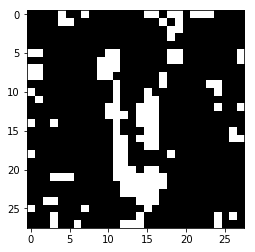

In [8]:
#test error rate
success = 0
failure = 0

for i in test_dataset_list:
    all_values = i.split(',')
    target = int(all_values[0])
    
    all_values_normalized = (np.asfarray(all_values[1:])/255*0.99) + 0.01
    prediction_list = pct.feedforward(np.asfarray(all_values_normalized))
    prediction = np.argmax(prediction_list)
    
    if target == prediction:
        success = success + 1
    else:
        failure = failure + 1
        print("Prediction fails. (target, prediction) = ", target, prediction)
        print("Prediction = ", prediction_list)
        im_array = np.asfarray(all_values_normalized).reshape((28,28))
        matplotlib.pyplot.imshow(im_array, cmap = 'Greys', interpolation = 'None')
        
print("Recognition error rate = ", (failure/(success + failure)))
print("success = ", success, ", failure = ", failure)